## Load Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data-synth/train.p"
validation_file= "traffic-signs-data-synth/valid.p"
testing_file = "traffic-signs-data-synth/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Validation Set: {} samples".format(len(X_valid)))
print("Test Set:       {} samples".format(len(X_test)))


Image Shape: (32, 32, 3)

Training Set:   34799 samples
Validation Set: 4410 samples
Test Set:       12630 samples


## Data Summary

In [2]:
# Number of training examples
n_train = len(X_train)

# Number of validation examples
n_validation = len(X_valid)

# Number of testing examples.
n_test = len(X_test)

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
n_classes = max(y_train)+1

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Classes Pre Analysis

<Container object of 43 artists>

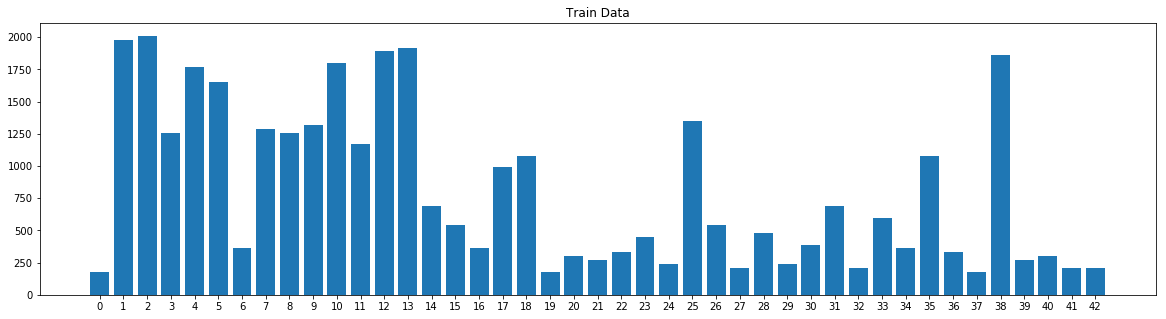

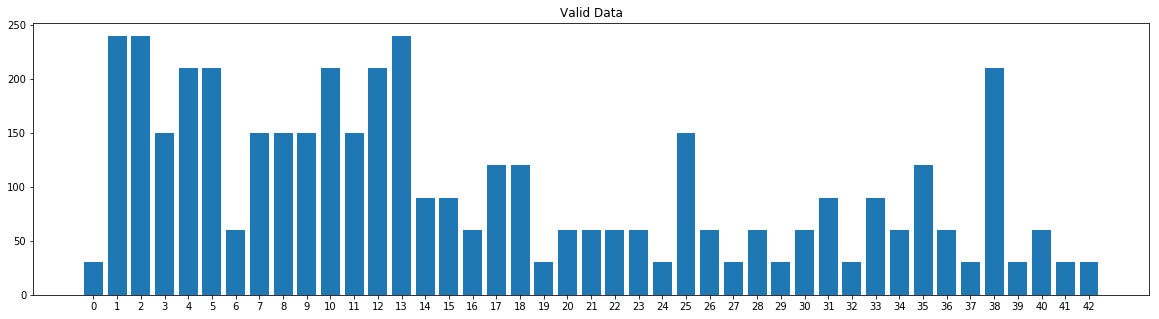

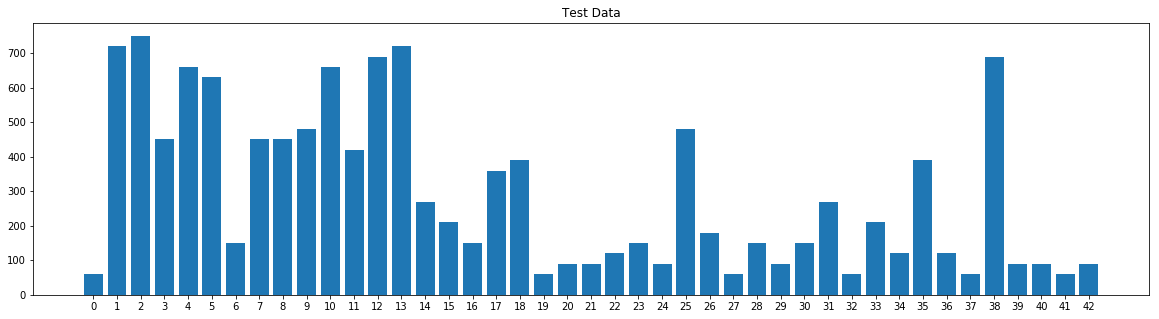

In [3]:
import random
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pylab as pl
%matplotlib inline

x = range(n_classes)
train_len= [0] * n_classes
vaild_len = [0] * n_classes
test_len = [0] * n_classes

for i in range(len(y_train)):
    train_len[y_train[i]] += 1

for i in range(len(y_valid)):
    vaild_len[y_valid[i]] += 1

for i in range(len(y_test)):
    test_len[y_test[i]] += 1

fig = plt.figure(0,figsize=(20,5))
ax = fig.add_subplot(111)
ax.set_title('Train Data')
plt.xticks(x)
plt.bar(x,train_len)

fig2 = plt.figure(1,figsize=(20,5))
ax2 = fig2.add_subplot(111)
ax2.set_title('Valid Data')
plt.xticks(x)
plt.bar(x,vaild_len)

fig3 = plt.figure(2,figsize=(20,5))
ax3 = fig3.add_subplot(111)
ax3.set_title('Test Data')
plt.xticks(x)
plt.bar(x,test_len)

## Image Transformations

Start...


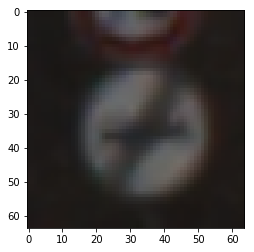

In [4]:
import cv2

def rotate(img,rotation):
    rows,cols,channels = img.shape
    M = cv2.getRotationMatrix2D((cols/2,rows/2),rotation,1)
    return cv2.warpAffine(img,M,(cols,rows))

def translate(img,transX,transY):
    rows,cols,channels = img.shape
    M = np.float32([[1,0,transX],[0,1,transY]])
    return cv2.warpAffine(img,M,(cols,rows))

def blur(img,kernel_size):
    kernel = np.ones((kernel_size,kernel_size),np.float32)/25
    return cv2.filter2D(img,-1,kernel)

train_Synth = []
y_train_Synth = []
print('Start...')
for i in range(n_classes):
    if(train_len[i] < 250):
        for j in range(n_train):
            if(y_train[j] == i):
                img = X_train[j]
                train_Synth.append(rotate(img,1))
                train_Synth.append(rotate(img,-1))
                train_Synth.append(translate(img,1,0))
                train_Synth.append(translate(img,-1,0))
                train_Synth.append(translate(img,0,1))
                train_Synth.append(translate(img,0,-1))
                train_Synth.append(blur(img,2))
                y_train_Synth.extend((i,i,i,i,i,i,i))
                
    if(train_len[i] >= 250 and train_len[i] <= 500):
        for j in range(n_train):
            if(y_train[j] == i):
                img = X_train[j]
                train_Synth.append(translate(img,1,0))
                train_Synth.append(translate(img,0,1))
                train_Synth.append(blur(img,2))
                y_train_Synth.extend((i,i,i))
    
    if(train_len[i] > 500 and train_len[i] < 750):
        for j in range(n_train):
            if(y_train[j] == i):
                img = X_train[j]
                train_Synth.append(blur(img,2))
                y_train_Synth.append(i)
                
X_train = np.append(X_train,np.asarray(train_Synth),0)
y_train = np.append(y_train,np.asarray(y_train_Synth),0)

#rotate -30 till 30
#translate 10 X , 10 Y , 10 * 10 X Y
img = X_train[0]
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.imshow(res)

1476.23255814
300.778589448
990


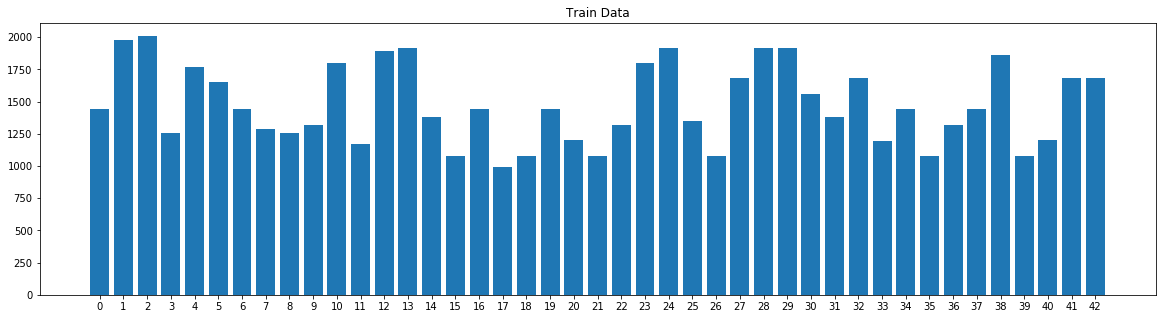

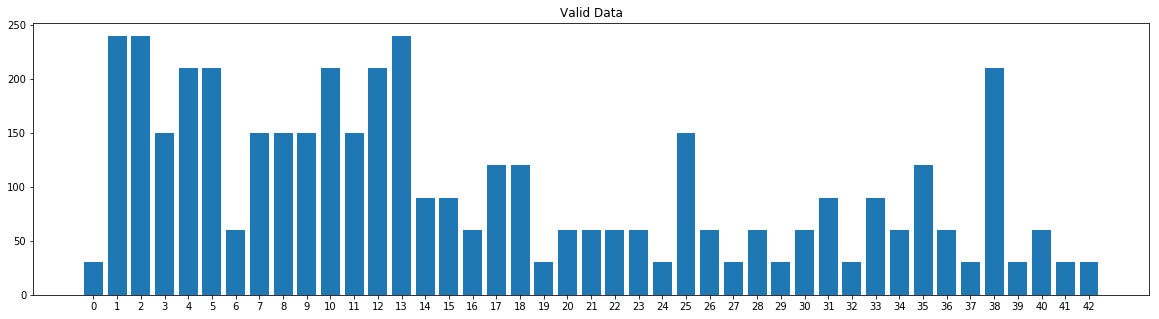

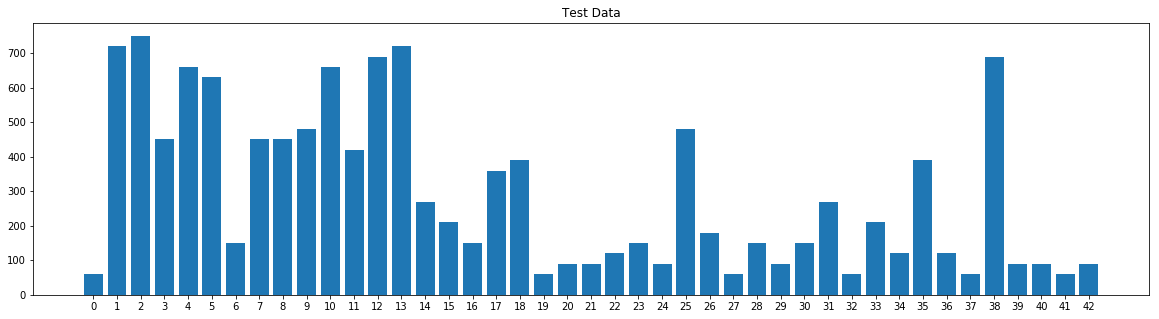

In [5]:
x = range(n_classes)
train_len= [0] * n_classes
vaild_len = [0] * n_classes
test_len = [0] * n_classes

for i in range(len(y_train)):
    train_len[y_train[i]] += 1

for i in range(len(y_valid)):
    vaild_len[y_valid[i]] += 1

for i in range(len(y_test)):
    test_len[y_test[i]] += 1

fig = plt.figure(0,figsize=(20,5))
ax = fig.add_subplot(111)
ax.set_title('Train Data')
plt.xticks(x)
plt.bar(x,train_len)

fig2 = plt.figure(1,figsize=(20,5))
ax2 = fig2.add_subplot(111)
ax2.set_title('Valid Data')
plt.xticks(x)
plt.bar(x,vaild_len)

fig3 = plt.figure(2,figsize=(20,5))
ax3 = fig3.add_subplot(111)
ax3.set_title('Test Data')
plt.xticks(x)
plt.bar(x,test_len)


print(np.mean(train_len))
print(np.std(train_len))
print(min(train_len))

## Save to Pickle File

In [6]:
new_data = {'features': X_train, 'labels': y_train}
with open(training_file,'wb') as wfp:
    pickle.dump(new_data, wfp)
print('Done')

Done
